<a href="https://colab.research.google.com/github/AshmithaMB/Text-Classification/blob/main/Product_Attribute_Label_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####***Project Statement & Project Overview***

> *The objective of this project is to develop a machine learning model for text classification, specifically focusing on product attributes. The model will be trained on a dataset consisting of text paragraphs describing various product features and attributes.*

> *By leveraging natural language processing (NLP) techniques and advanced machine learning algorithms, the project aims to automate the categorization of product attributes, enabling efficient analysis and organization of product data*

  ##### ***The Input file consists of two csv files:***

1. ***train_data.csv:***
 > *This file is used for training and contains two fields, namely "text" and "id".*

 > *The "text" field holds the input data, while the "id" field is a unique number assigned to each text.*

 > *This "id" serves as a reference to link the text with its corresponding labels in the "train_label.csv" file.*

2. ***train_label.csv :***

 > *This file contains two fields, "id" and "label". The "id" field in this file corresponds to the "id" field in the "train_data.csv" file.*

 > *It acts as a key to match the labels with the respective input texts.*

 > *The "label" field holds the corresponding labels for each text identified by the "id".*

### ***Importing the Libraries***

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from gensim.models import Word2Vec

from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### *Loading the CSV files*

In [2]:
data = pd.read_csv("train_data.csv", encoding='UTF-8')
data.head(1)

,text,id
0,"Keep your gloves, hats, coats and jackets toge...",122885


In [49]:
datalabels = pd.read_csv("train_label.csv", encoding='latin-1')
datalabels.label.unique()

array(['Shape', 'Voltage (volts)', 'Wattage (watts)',
       'ENERGY STAR Certified', 'Finish', 'Indoor/Outdoor',
       'Package Quantity', 'Features', 'Included', 'Hardware Included',
       'Color', 'Assembly Required', 'Tools Product Type',
       'Commercial / Residential', 'Flooring Product Type'], dtype=object)

*Here is an explanation of the meanings behind the labels:*

***Shape:***
> *This label represents the specific shape or form of a product. For example, in the context of furniture, it could refer to shapes like rectangular, round, square, or oval.*

***Voltage (volts):***
> *This label indicates the electrical voltage required or supported by a product. It is commonly used for electrical appliances or devices that operate on specific voltage levels.*

***Wattage (watts):***
> *This label refers to the power consumption or capacity of a product, measured in watts. It provides information about the energy usage or output of an electrical device.*

***ENERGY STAR Certified:***
> *This label signifies that a product has met specific energy efficiency standards set by ENERGY STAR, a program established to promote energy-saving practices. Products with this label are more energy-efficient and environmentally friendly.*

***Finish:***
> *This label describes the surface treatment or coating applied to a product. It could include finishes like polished, matte, glossy, or textured, depending on the nature of the product.*

***Indoor/Outdoor:***
> *This label indicates whether a product is suitable for indoor use, outdoor use, or both. It helps customers identify products that are designed to withstand outdoor conditions or have specific features for indoor usage.*

***Package Quantity:***
> *This label specifies the quantity or number of items included in a package or product bundle. It helps customers understand the quantity they will receive when making a purchase.*

***Features:***
> *This label highlights the distinctive features or functionalities of a product. It provides information about unique capabilities or characteristics that set the product apart from others.*

***Included:***
> *This label indicates the items or components that are included with a product. It helps customers know what additional items or accessories they will receive when purchasing the main product.*

***Hardware Included:***
> *This label specifically refers to the inclusion of hardware items or components with a product. It could include screws, bolts, nuts, or any other necessary hardware for assembly or installation.*

***Color:***
> *This label represents the specific color or color options available for a product. It helps customers choose products based on their preferred color preferences.*

***Assembly Required:***
> *This label indicates whether a product requires assembly by the customer. It informs customers if they need to assemble the product themselves or if it comes pre-assembled.*

***Tools Product Type:***
> *This label categorizes products based on their type as tools. It helps customers quickly identify products that fall into the tools category, such as power tools, hand tools, or gardening tools.*

***Commercial / Residential:***
> *This label distinguishes products suitable for commercial or residential use. It helps customers identify products that are designed for specific environments.*

***Flooring Product Type:***
> *This label classifies products specifically related to flooring materials or flooring-related products. It helps customers find products related to flooring, such as tiles, carpets, or laminate flooring.*

*These labels provide specific information about different aspects of a product, allowing customers to make informed decisions based on their preferences and requirements.*

### *Merging the DataFarmes*

In [4]:
df = pd.merge(data, datalabels, on='id')
df

,text,id,label
0,"Keep your gloves, hats, coats and jackets toge...",122885,Assembly Required
1,"Keep your gloves, hats, coats and jackets toge...",122885,Finish
2,"Keep your gloves, hats, coats and jackets toge...",122885,Hardware Included
3,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958,Commercial / Residential
4,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958,Features
...,...,...,...
75165,This industrial grade anti-fatigue mat is engi...,171764,Features
75166,This industrial grade anti-fatigue mat is engi...,171764,Flooring Product Type
75167,This industrial grade anti-fatigue mat is engi...,171764,Indoor/Outdoor
75168,The Nite Ize LED Upgrade Kit converts most C/D...,117326,Package Quantity


#### *Data Cleaning*
* *The original dataframe contained duplicated texts with unique labels associated with them.*

* *To address this, I grouped the dataframe based on the texts and aggregated the labels.*

* *This allowed to create a new dataframe with unique text values and their corresponding aggregated labels.*

* *Initially, the original dataframe had 15 unique labels. However, due to the duplication of texts, the new dataframe may have additional unique labels.*

* *The IDs associated with the texts were not necessary for building the model, so they were not included in the new dataframe.*
> *The resulting dataframe would have unique texts, but the labels might not be unique.*

In [5]:
df_grouped = df.groupby('text').agg({'id': list, 'label': lambda x: ', '.join(set(x))}).reset_index()
df_grouped['labels'] = df_grouped['label']
final_df = df_grouped[['text', 'labels']]

In [6]:
final_df

,text,labels
0,"""Constructor"" Prelude door locks feature moder...","Hardware Included, Finish"
1,"""Constructor"" Prelude door locks feature moder...","Hardware Included, Finish"
2,"""Constructor"" offers premium classic style doo...","Hardware Included, Finish"
3,"""Constructor"" offers premium classic style doo...","Hardware Included, Finish"
4,"""Constructor"" offers premium classic style doo...","Hardware Included, Finish"
...,...,...
41564,the great outdoors by Minka Lavery Irvington M...,"Wattage (watts), ENERGY STAR Certified"
41565,the great outdoors by Minka Lavery Irvington M...,"Wattage (watts), ENERGY STAR Certified"
41566,the great outdoors by Minka Lavery Irvington M...,"Wattage (watts), ENERGY STAR Certified"
41567,the great outdoors by Minka Lavery Irvington M...,"Wattage (watts), ENERGY STAR Certified"


In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41569 entries, 0 to 41568
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    41569 non-null  object
 1   labels  41569 non-null  object
dtypes: object(2)
memory usage: 649.6+ KB


### *Exploratory Data Analysis*

#### *Analyzing `Label` Column*

In [8]:
label_counts = final_df['labels'].value_counts()
unique_labels = len(label_counts)
print("Number of unique labels:", unique_labels)

Number of unique labels: 225


In [9]:
label_counts

Tools Product Type                                                                  3369
Package Quantity                                                                    2303
Color                                                                               2157
Assembly Required                                                                   2014
Commercial / Residential, Flooring Product Type, Indoor/Outdoor                     1755
                                                                                    ... 
Color, Indoor/Outdoor, ENERGY STAR Certified                                           1
Commercial / Residential, Indoor/Outdoor, ENERGY STAR Certified                        1
Commercial / Residential, Indoor/Outdoor, Voltage (volts), ENERGY STAR Certified       1
Included, Shape, Package Quantity                                                      1
Hardware Included, Color, Indoor/Outdoor, Assembly Required                            1
Name: labels, Length:

In [10]:
highest_count = label_counts.max()
lowest_count = label_counts.min()
average_count = label_counts.mean()

print("Highest Label Count:", highest_count)
print("Lowest Label Count:", lowest_count)
print("Average Label Count:", average_count)

Highest Label Count: 3369
Lowest Label Count: 1
Average Label Count: 184.7511111111111


In [11]:
quartiles = np.percentile(label_counts, [25, 50, 75])
iqr_25 = quartiles[0]
iqr_50 = quartiles[1]
iqr_75 = quartiles[2]

print("IQR at 25% :", iqr_25)
print("IQR 50% :", iqr_50)
print("IQR at 75% :", iqr_75)

IQR at 25% : 2.0
IQR 50% : 15.0
IQR at 75% : 126.0


* *The label counts in the data show a significant imbalance. On average, each label appears around 184 times, but looking at the middle value (50th percentile) of the label counts, it drops down to just 15. This suggests that a few labels are appearing much more frequently than others.*
* *The highest label count reaches 3369, which is considerably higher than the 75th percentile value of 126. This wide range between the highest count and the upper quartile indicates a significant imbalance in label distribution.*

In [12]:
label_counts

Tools Product Type                                                                  3369
Package Quantity                                                                    2303
Color                                                                               2157
Assembly Required                                                                   2014
Commercial / Residential, Flooring Product Type, Indoor/Outdoor                     1755
                                                                                    ... 
Color, Indoor/Outdoor, ENERGY STAR Certified                                           1
Commercial / Residential, Indoor/Outdoor, ENERGY STAR Certified                        1
Commercial / Residential, Indoor/Outdoor, Voltage (volts), ENERGY STAR Certified       1
Included, Shape, Package Quantity                                                      1
Hardware Included, Color, Indoor/Outdoor, Assembly Required                            1
Name: labels, Length:

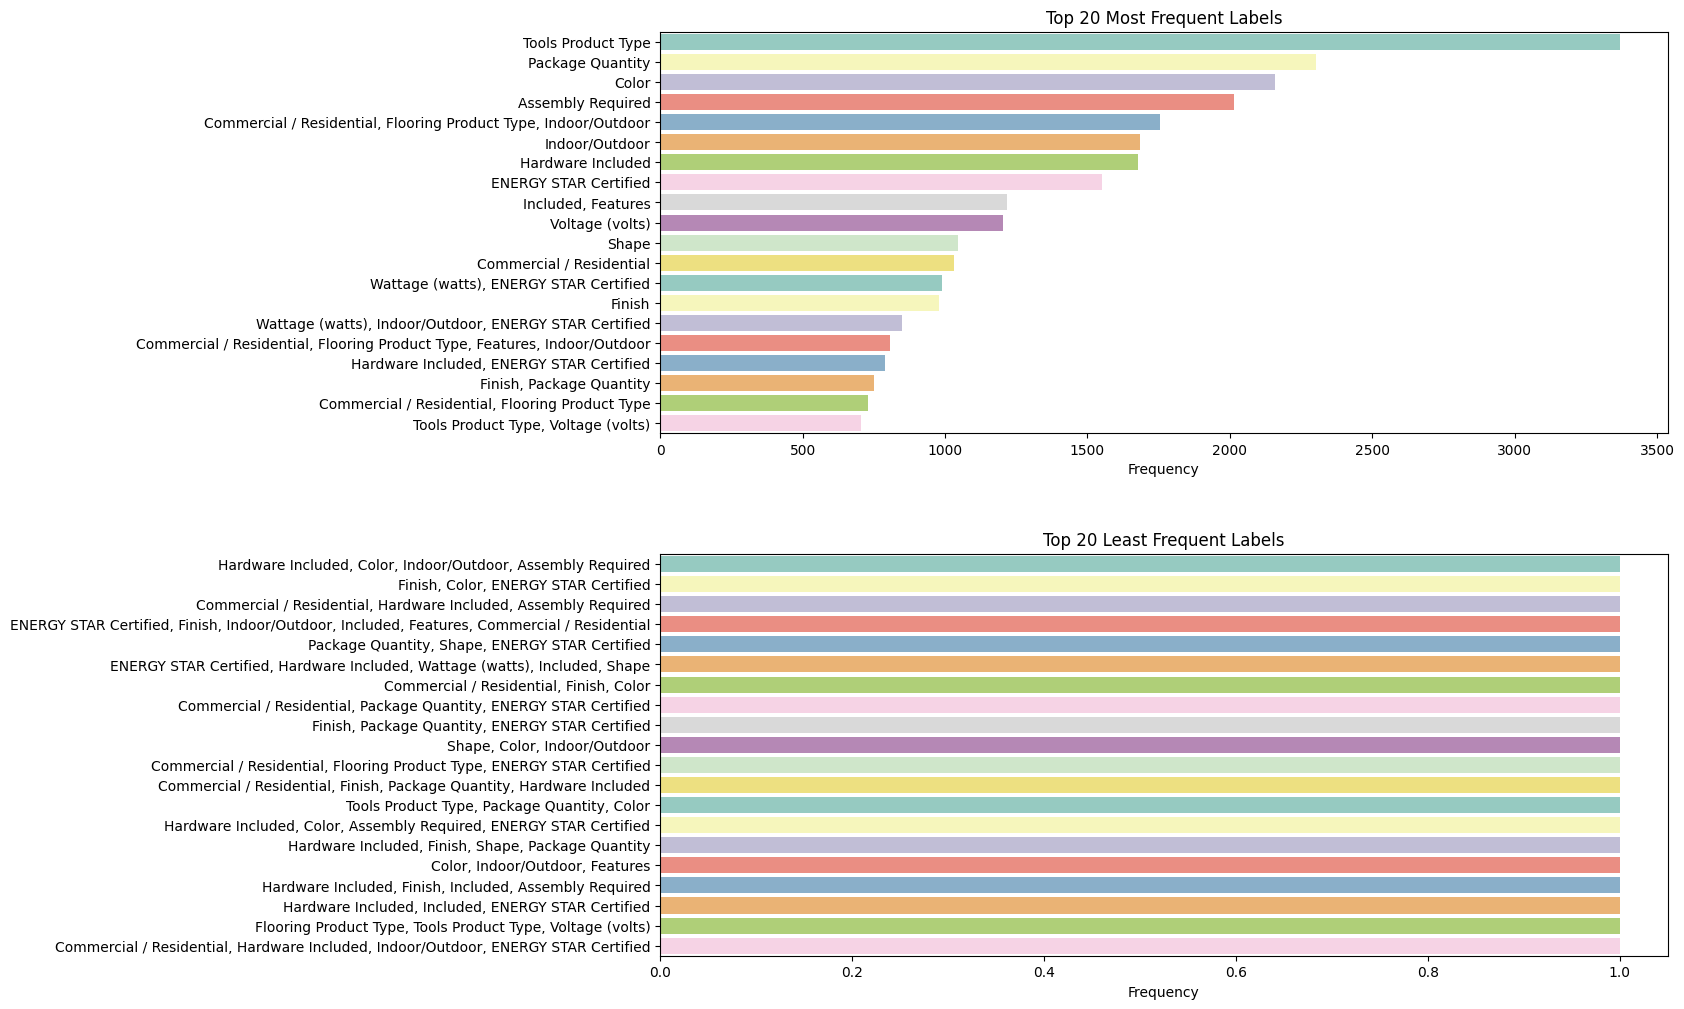

In [13]:
top_n = 20

top_frequent_labels = label_counts.sort_values(ascending=False).head(top_n)
top_least_frequent_labels = label_counts.sort_values(ascending=True).head(top_n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 12))

colors = sns.color_palette('Set3', n_colors=top_n)

sns.barplot(y=top_frequent_labels.index, x=top_frequent_labels, ax=ax1, palette=colors)
ax1.set_title(f'Top {top_n} Most Frequent Labels')
ax1.set_xlabel('Frequency')

sns.barplot(y=top_least_frequent_labels.index, x=top_least_frequent_labels, ax=ax2, palette=colors)
ax2.set_title(f'Top {top_n} Least Frequent Labels')
ax2.set_xlabel('Frequency')

plt.subplots_adjust(hspace=0.3)


* The label `Tools Product Type` is the most repeated label, appearing over 3400 times in the dataset.
* Following closely are the labels "Package Quantity" and "Color," which are repeated around 2300-2400 times.
* The top 15 most frequent labels consist mainly 11 out of 15 original labels, with only 4 newer aggregated labels which resulted from combining multiple labels from the original set.
* This could be because 11 out of 15 original labels, had duplicated texts associated with them, resulting in a larger number of occurrences for those labels.
* In contrast, the least frequent labels are exclusively composed of these newly aggregated labels.
* Since these labels combine different variations and categories from the original set, their occurrence is limited to just one instance.


#### *Analyzing `Text` Column*

In [14]:
dff = final_df.groupby('labels')['text'].apply(list).reset_index(name='Texts')
dff['Paragraphs'] = dff['Texts'].apply(lambda x: len(x))
dff['Words'] = dff['Texts'].apply(lambda x: len(' '.join(x).split()))
dff

,labels,Texts,Paragraphs,Words
0,Assembly Required,[3-Piece Bistro Set Includes Outdoor Dining Ta...,2014,313561
1,"Assembly Required, ENERGY STAR Certified",[The John Deere 2-Bar Bumper for 100 Series La...,2,150
2,"Assembly Required, Hardware Included, Finish, ...","[Create added privacy in a bedroom, dorm or ot...",13,1474
3,"Assembly Required, Voltage (volts)",[A commercial vacuum designed for all-around u...,183,32269
4,Color,"[""Eagle professional dock builder foam filled ...",2157,232770
...,...,...,...,...
220,"Wattage (watts), Indoor/Outdoor, Features","[Add a bright, fun LED light display to your o...",5,392
221,"Wattage (watts), Indoor/Outdoor, Voltage (volts)",[Activating and deactivating your water heater...,95,12444
222,"Wattage (watts), Indoor/Outdoor, Voltage (volt...",[The Bosch/Powerstar 12 kW tankless water heat...,5,1080
223,"Wattage (watts), Voltage (volts)",[2 built-in 20-watt halogen lights illuminate ...,310,64684


* *The `Texts` column shows the list of all the texts grouped by their corresponding labels.*

* *The `Paragraphs` column represents the count of individual text for each label.*

* *The `Words` column displays the count of words for each label.*

  > *By using these columns, we can understand how many texts (paragraphs) and words are associated with each label in the dataset.*

In [15]:
top_n = 20

top_labels = label_counts.sort_values(ascending=False)[:top_n]
total_occurrences = top_labels.sum()
print("Total Occurrences of Top 20 Labels:", total_occurrences)

total_occurrences = label_counts.sum()
print("Total Occurrences of All the 225 Labels:", total_occurrences)

Total Occurrences of Top 20 Labels: 27610
Total Occurrences of All the 225 Labels: 41569



* *Analyzing the top 20 labels, out of the total of 225, as they have a combined count of 27610, which accounts for about 66.43% of the total count of 41569.*

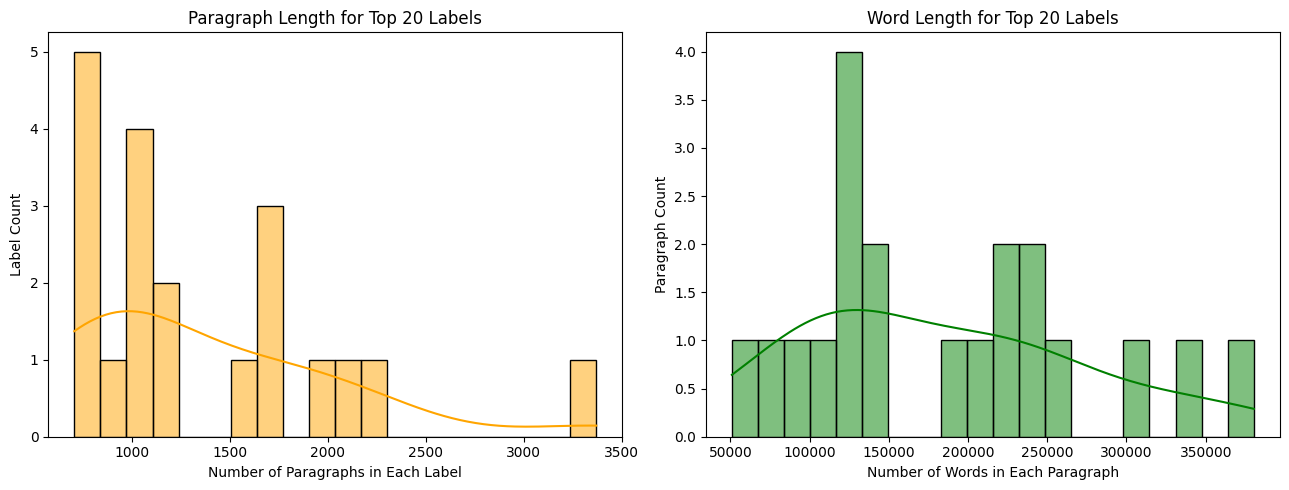

In [16]:
top_20_labels = dff.nlargest(20, 'Paragraphs')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

sns.histplot(top_20_labels['Paragraphs'], bins=20, color='orange', kde = True, ax=axes[0])
axes[0].set_title('Paragraph Length for Top 20 Labels')
axes[0].set_xlabel('Number of Paragraphs in Each Label')
axes[0].set_ylabel("Label Count")

sns.histplot(top_20_labels['Words'], bins=20, color='green', kde = True, ax=axes[1])
axes[1].set_title('Word Length for Top 20 Labels')
axes[1].set_xlabel('Number of Words in Each Paragraph')
axes[1].set_ylabel("Paragraph Count")

plt.tight_layout()


*Analysis of Top 20 Labels:*

***Paragraph Length:***

* 12 labels have 500-1200 paragraphs.
* 7 labels have 1500-2250 paragraphs.
* Only 1 label has 3500 paragraphs.

***Word Length:***

* 10 out of 20 labels have a word count of 50,000 to 150,000.
* 5 labels have 200,000-250,000 words.
* Only 3 out of 20 labels have 300,000-370,000 words.

In [17]:
top_n = 200

top_labels = label_counts.sort_values(ascending=True)[:top_n]
total_occurrences = top_labels.sum()
print("Total Occurrences of Top 200 Labels:", total_occurrences)

total_occurrences = label_counts.sum()
print("Total Occurrences of All the 225 Labels:", total_occurrences)

Total Occurrences of Top 200 Labels: 10994
Total Occurrences of All the 225 Labels: 41569


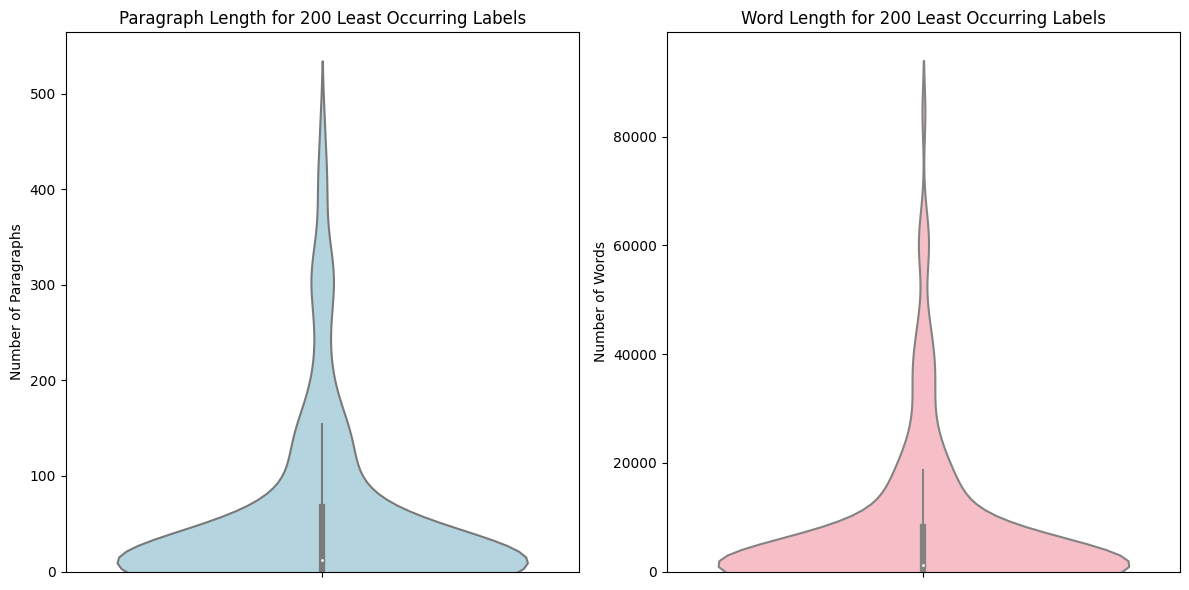

In [18]:
least_100_labels = dff.nsmallest(200, 'Paragraphs')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(y=least_100_labels['Paragraphs'], color='lightblue', ax=ax1)
ax1.set_title('Paragraph Length for 200 Least Occurring Labels')
ax1.set_ylabel('Number of Paragraphs')
ax1.set_ylim(bottom=0)

sns.violinplot(y=least_100_labels['Words'], color='lightpink', ax=ax2)
ax2.set_title('Word Length for 200 Least Occurring Labels')
ax2.set_ylabel('Number of Words')
ax2.set_ylim(bottom=0)

plt.tight_layout();

##### *Analysis of Paragraph and Word Length for 200 Least Occurring Labels*


***Paragraph Length***
 * *The majority of labels in this subset have less than 100 paragraphs*
 * *However, a small number of labels have a paragraph count ranging from 100 to 300.*
 * *The maximum count observed is 550, but these higher counts are extremely rare, with only 1 or 2 labels having such occurrences.*

***Word Length***
* *Majority of the labels among the least occurring 200 labels have a word count below 200,000.*
* *Another small group of labels fall within the word count range of 200,000 to 600,000*
* *However, labels with word counts above 600,000 are with only a negligible number of occurrences.*

### ***Text Preprocessing***

* *Punctuation Removal*
* *Lower - casing*
* *Tokenization*
* *Stopwords Removal*
* *Lemmatization*


In [19]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [20]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [21]:
final_df['processed_text'] = final_df['text'].apply(preprocess_text)

<ipython-input-21-739c49fadc34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['processed_text'] = final_df['text'].apply(preprocess_text)


In [22]:
tokenized_texts = final_df['processed_text'].apply(lambda x: x.split())
final_df

,text,labels,processed_text
0,"""Constructor"" Prelude door locks feature moder...","Hardware Included, Finish",`` constructor '' prelude door lock feature mo...
1,"""Constructor"" Prelude door locks feature moder...","Hardware Included, Finish",`` constructor '' prelude door lock feature mo...
2,"""Constructor"" offers premium classic style doo...","Hardware Included, Finish",`` constructor '' offer premium classic style ...
3,"""Constructor"" offers premium classic style doo...","Hardware Included, Finish",`` constructor '' offer premium classic style ...
4,"""Constructor"" offers premium classic style doo...","Hardware Included, Finish",`` constructor '' offer premium classic style ...
...,...,...,...
41564,the great outdoors by Minka Lavery Irvington M...,"Wattage (watts), ENERGY STAR Certified",great outdoors minka lavery irvington manor 1-...
41565,the great outdoors by Minka Lavery Irvington M...,"Wattage (watts), ENERGY STAR Certified",great outdoors minka lavery irvington manor 2-...
41566,the great outdoors by Minka Lavery Irvington M...,"Wattage (watts), ENERGY STAR Certified",great outdoors minka lavery irvington manor 3-...
41567,the great outdoors by Minka Lavery Irvington M...,"Wattage (watts), ENERGY STAR Certified",great outdoors minka lavery irvington manor 3-...


In [31]:
tokenized_labels = [label.split() for label in final_df['labels']]

In [32]:
model = Word2Vec(tokenized_labels, vector_size=100, window=5, min_count=1, workers=4)

In [33]:
label_embeddings = []

for label in final_df['labels']:
    if label in model.wv:
        label_embeddings.append(model.wv[label])
    else:
        label_embeddings.append([0] * 100)

In [34]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(label_embeddings)

In [35]:
final_df['cluster_labels'] = cluster_labels

In [44]:
final_df.labels.unique()

array(['Hardware Included, Finish', 'Color', 'ENERGY STAR Certified',
       'Hardware Included, Package Quantity',
       'Commercial / Residential, Flooring Product Type',
       'Tools Product Type', 'Voltage (volts), ENERGY STAR Certified',
       'Package Quantity', 'Indoor/Outdoor', 'Hardware Included',
       'Hardware Included, Assembly Required',
       'Included, Indoor/Outdoor, Features',
       'Package Quantity, Color, Shape',
       'Commercial / Residential, Flooring Product Type, Indoor/Outdoor',
       'Commercial / Residential', 'Shape, Color',
       'Flooring Product Type', 'Tools Product Type, Included',
       'Finish, Package Quantity',
       'Commercial / Residential, Included, Voltage (volts)',
       'Wattage (watts), ENERGY STAR Certified', 'Finish',
       'Commercial / Residential, Flooring Product Type, Features, Indoor/Outdoor',
       'Wattage (watts)',
       'Hardware Included, Shape, ENERGY STAR Certified',
       'Wattage (watts), Indoor/Outdoor, EN

In [37]:
cluster_label_mapping = final_df[['cluster_labels', 'labels']].drop_duplicates().sort_values('cluster_labels')
cluster_label_mapping.head(11)

,cluster_labels,labels
0,0,"Hardware Included, Finish"
4758,0,"Wattage (watts), Indoor/Outdoor"
4784,0,"Hardware Included, Wattage (watts), ENERGY STA..."
4837,0,"Shape, Wattage (watts), Voltage (volts), ENERG..."
5105,0,"Color, Features"
5120,0,"Assembly Required, Hardware Included, Finish, ..."
5477,0,"Included, Features, Voltage (volts)"
5675,0,"Color, Voltage (volts)"
5859,0,"Wattage (watts), Included, Color, Shape"
6422,0,"Commercial / Residential, Wattage (watts), Vol..."


### *Building the Model*

In [38]:
X_train, X_test, y_train, y_test = train_test_split(final_df['processed_text'],
                                                    final_df['cluster_labels'],
                                                    test_size=0.1,
                                                    random_state=444)

#### *Linear Support Vector Classifier*

In [39]:
%%time
pipeline = Pipeline([
    ('Tfidf Vectorizer', TfidfVectorizer()),
    ('ML Model', LinearSVC())])

model_LinearSVC = pipeline.fit(X_train, y_train)
predictions = model_LinearSVC.predict(X_test)

print('ML Model - Linear SVC\n')

accuracy_LinearSVC = accuracy_score(y_test, predictions)
print(f"Accuracy Score: {round(accuracy_LinearSVC * 100, 2)}%")

print('\nConfusion Matrix')
print(confusion_matrix(y_test, predictions))

print("\nClassification Report")
print(classification_report(y_test, predictions))


ML Model - Linear SVC

Accuracy Score: 95.81%

Confusion Matrix
[[3473    5   19   11    3    2    4]
 [  22  128    2    0    0    0    0]
 [  38    1  159    0    0    0    0]
 [  18    1    0   94    0    0    0]
 [  12    0    0    0   25    0    0]
 [  11    0    0    0    0   39    0]
 [  23    0    2    0    0    0   65]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3517
           1       0.95      0.84      0.89       152
           2       0.87      0.80      0.84       198
           3       0.90      0.83      0.86       113
           4       0.89      0.68      0.77        37
           5       0.95      0.78      0.86        50
           6       0.94      0.72      0.82        90

    accuracy                           0.96      4157
   macro avg       0.92      0.81      0.86      4157
weighted avg       0.96      0.96      0.96      4157

CPU times: user 4.99 s, sys: 52.2 ms, total: 5.04

#### *K-Nearest Neighbors Classifier*

In [50]:
%%time
pipeline = Pipeline([
    ('CountVectorizer', CountVectorizer()),
    ('Tfidf Vectorizer', TfidfTransformer()),
    ('ML Model', KNeighborsClassifier(n_neighbors=10, weights='distance'))])

model_KNN1 = pipeline.fit(X_train, y_train)
predictions = model_KNN1.predict(X_test)
print('ML Model - K Nearest Neighbors\n')

accuracy_KNN1 = accuracy_score(y_test, predictions)
print(f"Accuracy Score: {round(accuracy_KNN1 * 100, 2)}%")

print('\nConfusion Matrix')
print(confusion_matrix(y_test, predictions))

print("\nClassification Report")
print(classification_report(y_test, predictions))

ML Model - K Nearest Neighbors

Accuracy Score: 95.45%

Confusion Matrix
[[3466    5   16   15    5    3    7]
 [  23  127    2    0    0    0    0]
 [  35    0  161    0    1    0    1]
 [  23    1    2   86    0    0    1]
 [   8    0    0    0   29    0    0]
 [  11    0    1    0    0   38    0]
 [  26    0    0    2    1    0   61]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3517
           1       0.95      0.84      0.89       152
           2       0.88      0.81      0.85       198
           3       0.83      0.76      0.80       113
           4       0.81      0.78      0.79        37
           5       0.93      0.76      0.84        50
           6       0.87      0.68      0.76        90

    accuracy                           0.95      4157
   macro avg       0.89      0.80      0.84      4157
weighted avg       0.95      0.95      0.95      4157

CPU times: user 19min 26s, sys: 904 ms, 

#### *Logistic Reggression*

In [51]:
%%time
pipeline = Pipeline([
    ('CountVectorizer', CountVectorizer()),
    ('Tfidf Vectorizer', TfidfTransformer()),
    ('ML Model', LogisticRegression())])

model_LogR = pipeline.fit(X_train, y_train)


predictions = model_LogR.predict(X_test)

accuracy_LogR = accuracy_score(y_test, predictions)
print(f"Accuracy Score: {round(accuracy_LogR * 100, 2)}%")

print('\nConfusion Matrix')
print(confusion_matrix(y_test, predictions))

print("\nClassification Report")
print(classification_report(y_test, predictions))

Accuracy Score: 93.17%

Confusion Matrix
[[3484    1   17    8    4    1    2]
 [  47  102    3    0    0    0    0]
 [  63    1  134    0    0    0    0]
 [  45    0    3   64    0    1    0]
 [  23    0    0    0   14    0    0]
 [  26    0    0    0    0   24    0]
 [  38    0    1    0    0    0   51]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3517
           1       0.98      0.67      0.80       152
           2       0.85      0.68      0.75       198
           3       0.89      0.57      0.69       113
           4       0.78      0.38      0.51        37
           5       0.92      0.48      0.63        50
           6       0.96      0.57      0.71        90

    accuracy                           0.93      4157
   macro avg       0.90      0.62      0.72      4157
weighted avg       0.93      0.93      0.93      4157

CPU times: user 33.6 s, sys: 19.7 s, total: 53.4 s
Wall time: 32 s


#### *Decision Tree Classifier*

In [52]:
%%time
pipeline = Pipeline([
    ('CountVectorizer', CountVectorizer()),
    ('Tfidf Vectorizer', TfidfTransformer()),
    ('ML Model', DecisionTreeClassifier(criterion='entropy',
                                        splitter='best',
                                        max_depth=10,
                                        random_state=33))])

model_DT = pipeline.fit(X_train, y_train)
predictions = model_DT.predict(X_test)
print('ML Model - Decision Tree\n')

accuracy_DT = accuracy_score(y_test, predictions)
print(f"Accuracy Score: {round(accuracy_DT * 100, 2)}%")

print('\nConfusion Matrix')
print(confusion_matrix(y_test, predictions))

print("\nClassification Report")
print(classification_report(y_test, predictions))

ML Model - Decision Tree

Accuracy Score: 87.44%

Confusion Matrix
[[3494    3   10    3    1    4    2]
 [ 126   25    1    0    0    0    0]
 [ 158    0   38    0    0    0    2]
 [  93    0    0   20    0    0    0]
 [  33    0    0    0    4    0    0]
 [  28    1    2    0    0   19    0]
 [  54    0    0    1    0    0   35]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3517
           1       0.86      0.16      0.28       152
           2       0.75      0.19      0.31       198
           3       0.83      0.18      0.29       113
           4       0.80      0.11      0.19        37
           5       0.83      0.38      0.52        50
           6       0.90      0.39      0.54        90

    accuracy                           0.87      4157
   macro avg       0.83      0.34      0.44      4157
weighted avg       0.87      0.87      0.84      4157

CPU times: user 11.2 s, sys: 27.4 ms, total: 1

#### *AdaBoost Classifier*

In [53]:
%%time
pipeline = Pipeline([
    ('CountVectorizer', CountVectorizer()),
    ('Tfidf Vectorizer', TfidfTransformer()),
    ('ML Model', AdaBoostClassifier(n_estimators=10, random_state=33))
])

model_AB1 = pipeline.fit(X_train, y_train)
predictions = model_AB1.predict(X_test)
print('ML Model - AdaBoost\n')

accuracy_AB1 = accuracy_score(y_test, predictions)
print(f"Accuracy Score: {round(accuracy_AB1 * 100, 2)}%")

print('\nConfusion Matrix')
print(confusion_matrix(y_test, predictions))

print("\nClassification Report")
print(classification_report(y_test, predictions, zero_division=1))

ML Model - AdaBoost

Accuracy Score: 84.92%

Confusion Matrix
[[3507    4    0    3    0    3    0]
 [ 133   19    0    0    0    0    0]
 [ 198    0    0    0    0    0    0]
 [ 113    0    0    0    0    0    0]
 [  37    0    0    0    0    0    0]
 [  46    0    0    0    0    4    0]
 [  90    0    0    0    0    0    0]]

Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3517
           1       0.83      0.12      0.22       152
           2       1.00      0.00      0.00       198
           3       0.00      0.00      0.00       113
           4       1.00      0.00      0.00        37
           5       0.57      0.08      0.14        50
           6       1.00      0.00      0.00        90

    accuracy                           0.85      4157
   macro avg       0.75      0.17      0.18      4157
weighted avg       0.83      0.85      0.79      4157

CPU times: user 8.22 s, sys: 27.2 ms, total: 8.25 s

#### *Predictions*

In [54]:
y_predicted = model_LinearSVC.predict(X_test)
y_predicted

array([1, 0, 0, ..., 2, 0, 0], dtype=int32)

In [55]:
predictions = pd.DataFrame(y_predicted)
predictions

,0
0,1
1,0
2,0
3,0
4,0
...,...
4152,0
4153,0
4154,2
4155,0


#### *Conclusion*

*This project aimed to classify text paragraphs into product attribute labels. The data was meticulously cleaned and duplicates were grouped, resulting in 225 unique labels. Semantic relationships were extracted using Word2Vec and K-means, identifying the top 50 features.*

*The performance of five machine learning models, namely KNN, AdaBoost, Decision Tree, Linear SVC, and Logistic Regression, was evaluated. Among them, the Linear SVC algorithm stood out as the top performer, boasting an impressive accuracy of 96%.*

*Overall, this project showcases the effectiveness of employing natural language processing and machine learning techniques in accurately classifying text.*

In [56]:
import pickle

pipeline = Pipeline([
    ('Tfidf Vectorizer', TfidfVectorizer()),
    ('ML Model', LinearSVC())
])

model_LinearSVC = pipeline.fit(X_train, y_train)

with open('LabelExtractionModel', 'wb') as file:
    pickle.dump(model_LinearSVC, file)

In [57]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(label_embeddings)
final_df['cluster_labels'] = cluster_labels

final_df[['cluster_labels', 'labels']].to_pickle('cluster_label_mapping.pkl')

tokenized_labels = [label.split() for label in final_df['labels']]

In [58]:
model = Word2Vec(tokenized_labels, vector_size=100, window=5, min_count=1, workers=4)

model.save('word2vec_model.pkl')

In [59]:
with open('cluster_label_mapping.pkl', 'rb') as file:
    cluster_label_mapping = pickle.load(file)

# Check if it is a DataFrame
if isinstance(cluster_label_mapping, pd.DataFrame):
    print("cluster_label_mapping.pkl is a valid DataFrame.")
else:
    print("cluster_label_mapping.pkl is not a valid DataFrame.")

# Load Word2Vec model
with open('word2vec_model.pkl', 'rb') as file:
    word2vec_model = pickle.load(file)

# Check if it is a Word2Vec model
if isinstance(word2vec_model, Word2Vec):
    print("word2vec_model.pkl is a valid Word2Vec model.")
else:
    print("word2vec_model.pkl is not a valid Word2Vec model.")


cluster_label_mapping.pkl is a valid DataFrame.
word2vec_model.pkl is a valid Word2Vec model.
